# Nama = Zhafran Farras Ghonim 
# NIM    = 09011381722137
# SK.5U (Kecerdasan Buatan)


# Implementasi Logika Fuzzy Mamdani Dalam Game Simulasi Memancing 

### Logika Fuzzy
Fuzzy menurut bahasa artinya samar atau kabur. Suatu kata atau istilah dikatakan kabur apabila kata atau istilah tersebut tidak dapat didefinisikan secara tegas, dalam arti tidak dapat ditentukan secara tegas (benar atau salah) apakah suatu obyek tertentu memiliki ciri atau sifat yang diungkapkan oleh kata itu atau tidak. Logika fuzzy berarti perkiraan penalaran, informasi granulasi, komputasi dengan kata-kata dan sebagainya.

### Sistem Inferensi Fuzzy Mamdani
Sistem inferensi fuzzy metode Mamdani merupakan sistem inferensi yang sering digunakan. Sistem inferensi fuzzy dengan menggunakan metode Mamdani sering disebut dengan metode max-min. 

Game simulasi memancing merupakan sebuah permainan yang menirukan kegiatan memancing. Game simulasi memancing terlihat menarik apabila game tersebut benar-benar mempresentasikan kejadian nyata secara detail. Untuk memenuhi hal tersebut, game memancing dapat disisipkan hal-hal yang berkaitan dengan habitat dan perilaku ikan yang ada didunia nyata. Perilaku ikan berupa waktu makan ikan dan kedalaman air. Penelitian ini bertujuan untuk mencari suatu model yang dapat digunakan dalam menentukan suatu jenis ikan berdasarkan habitat dan perilaku ikan. 

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Fungsi Import adalah memanggil file lain kedalam satu file yang berbeda.

Numpy merupakan salah satu library yang digunakan oleh library lain seperti Scikit-Learn untuk keperluan analisis data.

skfuzzy atau scikit fuzzy adalah kumpulan algoritma logika Fuzzy yang digunakan dalam SciPy Stack, ditulis dalam bahasa komputasi Python.

Matplotlib adalah library paling banyak digunakan oleh data science untuk menyajikan datanya ke dalam visual yang lebih baik.


## Fuzzifikasi

In [5]:
Kedalaman_Kail = ctrl.Antecedent(np.arange(1, 900, 1), 'Kedalaman Kail')
Kedalaman_x = np.arange(1, 900, 1) 

In [6]:
Jam_Pemancingan = ctrl.Antecedent(np.arange(1, 1440, 1), 'Jam Pemancingan')
Jam_x = np.arange(1, 1440, 1)

In [7]:
Ikan = ctrl.Consequent(np.arange(1, 100, 1), 'Ikan')
Ikan_x = np.arange(1,100,1)

Disini saya memakai logika fuzzy dalam game simulasi memancing, diatas adalah sebuah code yang berfungsi untuk menentukan Input 1, Input 2, dan Output. cara menentukan input adalah dengan mengetikkan perintah "ctrl.Antecedent". dan cara menetukan output dengan mengetikkan perintah "ctrl.Consequent".
Antecedent adalah variabel input/sensor. 

Consequent adalah Variabel ouput/control.

- Input 1 : Kedalaman Kail
- Input 2 : Jam Pemancingan
- Output  : Ikan


### Fuzzifikasi Kedalaman Kail

Untuk Kedalaman kail, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Kedalaman\,Kail$$
$$ Dangkal = 100 CM - 400 CM$$
$$ Sedang = 400 CM - 700 CM$$
$$ Dalam = 700 CM - Lebih$$

Dari data tersebut maka dibuatlah variabel kedalaman dengan semesta pembiraan [0-900],  dan dibagi menjadi 3 himpunan fuzzy yaitu [DANGKAL, SEDANG, DALAM]. Tiap himpunan fuzzy memiliki domain masing-masing. Variabel kedalaman kail pancing diukur dengan satuan sentimeter, yang domain nya antara 0 sampai 900. 100-400 sentimeter termasuk dangkal, 400-700 sentimeter termasuk sedang, dan 700 sentimeter lebih termasuk dalam.


Dengan fungsi keanggotaan Kedalaman Kail

\begin{equation}
  \mu Dangkal(Kedalaman)=\begin{cases}
    \frac{(500 - Kedalaman)}{(500)} &,\text{$0\leq Kedalaman\leq500$}.\\ 
    0 &,\text{$500 \leq Kedalaman$}.\\
  \end{cases}
  \\
  \mu Sedang(Kedalaman)=\begin{cases}
    \frac {(Kedalaman - 200)}{(300)} & ,\text{$ 200 \leq$  Kedalaman $\leq500$}.\\
    \frac{(800-Kedalaman)}{(300)} & ,\text{$ 500 \leq$ Kedalaman $\leq800$}.\\
    0  &, \text{$200 \geq$ Kedalamanan $ atau $ Kedalaman $\geq800$}.\\ 
  \end{cases} 
  \\
  \mu Dalam(Kedalaman)=\begin{cases}
    \frac{(Kedalaman-500)}{(400)} & ,\text{$ 500 \leq$ Kedalaman $\leq900$}.\\
    0 &, \text{$500 \geq$ Kedalaman}.\\
  \end{cases}
\end{equation}



In [8]:
Kedalaman_Kail['Dangkal'] = fuzz.trimf(Kedalaman_Kail.universe, [0, 1, 500])
Kedalaman_Kail['Sedang'] = fuzz.trimf(Kedalaman_Kail.universe, [200, 500, 800])
Kedalaman_Kail['Dalam'] = fuzz.trimf(Kedalaman_Kail.universe, [500, 900, 900])

#### PLOTTING MEMBERSHIP FUNCTION KEDALAMAN KAIL

Plotting fungsi keanggotaan $\mu Dangkal(x)$

Text(0.5,1,'Dangkal')

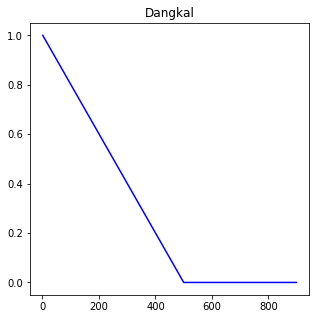

In [9]:
Kedalaman_Dangkal = fuzz.trimf(Kedalaman_x,[0,1,500])
fig, (ax0) = plt.subplots(nrows=1,figsize=(5,5))
ax0.plot(Kedalaman_x,Kedalaman_Dangkal,'blue')
ax0.set_title('Dangkal')

Plotting fungsi keanggotaan $\mu Sedang(x)$

Text(0.5,1,'Sedang')

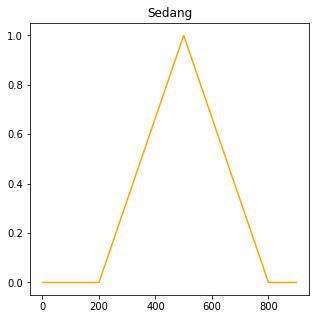

In [10]:
Kedalaman_Sedang = fuzz.trimf(Kedalaman_x,[200, 500, 800])
fig2, (ax1) = plt.subplots(nrows=1,figsize=(5,5))
ax1.plot(Kedalaman_x,Kedalaman_Sedang,'orange')
ax1.set_title('Sedang')

Plotting fungsi keanggotaan $\mu Dalam(x)$

Text(0.5,1,'Dalam')

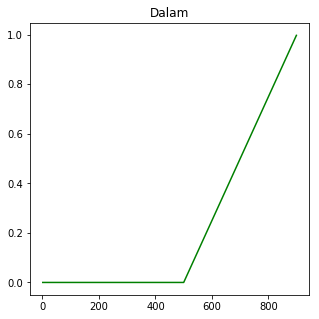

In [11]:
Kedalaman_Dalam = fuzz.trimf(Kedalaman_x,[500, 900, 900])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(5,5))
ax2.plot(Kedalaman_x,Kedalaman_Dalam,'green')
ax2.set_title('Dalam')

Gabungkan ke tiga keanggotan diatas, dengan cara perintah x.view()

C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


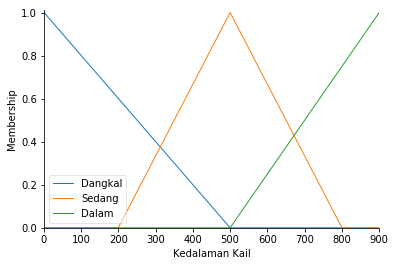

In [12]:
Kedalaman_Kail.view()

DANGKAL mempunyai domain [0-500] yang digmbarkan sebagai kurva linier turun, 

SEDANG mempunyai domain [200-800] yang digambarkan sebagai kurva segitiga dengan titik puncak pada kedalaman 500, dan 

DALAM mempunyai domain [500-900] yang digambarkan sebagai kurva linier naik.

### Fuzzifikasi Jam Pemancingan

Untuk Jam Pemancingan, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Jam\,Pemancingan$$
$$ Malam = 0  - 600 menit$$
$$ Siang = 120 - 1320 menit$$
$$ Sore = 840 - 1440 menit$$

Jam pemancingan diukur dalam satuan menit. Jika dalam satu jam terdapat 60 menit maka dalam satu hari terdapat 1440 menit. ikan [Diurnal] aktif antara jam [06.00-18.00] sedangkan ikan [Nokturnal] aktif pada jam [18.00-06.00]. Berdasarkan data tersebut berarti ikan diurnal aktif pada menit 360-1080, sedangkan nokturnal aktif pada menit 1080-1440 dan 0-360 dengan catatan menit 0 dimulai pada jam 00.00. Dari analisa tersebut maka dibuat variabel Jam pemancingan dengan semesta pembiraan [0-1440] dan dibagi menjadi 3 himpunan fuzzy yaitu [Malam, Siang, Sore].


Dengan fungsi keanggotaan Jam Pemancingan

\begin{equation}
  \mu Malam(Jam)=\begin{cases}
    1 &, \text{$ 0 \leq$  Jam $\leq 120$}.\\
    \frac{(600 - Jam)}{(480)} & ,\text{$ 120 \leq$  Jam $\leq 600$}.\\
    0 &,\text{$jam\leq 600$}.\\
  \end{cases}
  \\
  \mu Siang(Jam)=\begin{cases}
    \frac{(Jam - 120)}{(480)} &,\text{$120\leq Jam\leq600$}.\\ 
    1 &,\text{$600\leq Jam \leq840$}.\\
    \frac{(1320 - Jam)}{(480)} &,\text{$840\leq Jam\leq1320$}.\\ 
    0 &,\text{$120 \geq Jam$ atau $\leq1320$}.\\
  \end{cases}
  \\
  \mu Sore(Jam)=\begin{cases}
    0& , \text{$ Jam \leq840$}.\\
    \frac{(Jam - 840)}{(480)} & ,\text{$ 840 \leq$ Jam $\leq1440$}.\\
    1 &, \text{$Jam \geq$ 1440}.\\
  \end{cases}
\end{equation}



In [13]:
Jam_Pemancingan['Malam'] = fuzz.trapmf(Jam_Pemancingan.universe, [0, 1, 120, 600])
Jam_Pemancingan['Siang'] = fuzz.trapmf(Jam_Pemancingan.universe, [120, 600, 840, 1320])
Jam_Pemancingan['Sore'] = fuzz.trapmf(Jam_Pemancingan.universe, [840, 1320, 1440, 1440])

#### PLOTTING MEMBERSHIP FUNCTION JAM PEMANCINGAN

Plotting fungsi keanggotaan $\mu Malam(x)$

Text(0.5,1,'Malam')

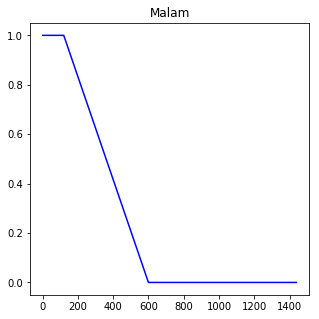

In [14]:
Jam_Malam = fuzz.trapmf(Jam_x,[0,1,120,600])
fig, (ax0) = plt.subplots(nrows=1,figsize=(5,5))
ax0.plot(Jam_x,Jam_Malam,'blue')
ax0.set_title('Malam')

Plotting fungsi keanggotaan $\mu Siang(x)$

Text(0.5,1,'Siang')

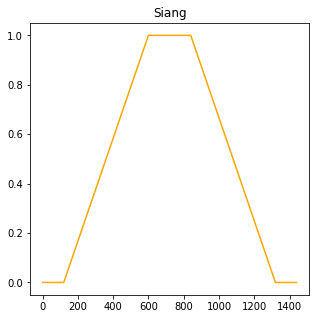

In [15]:
Jam_Siang = fuzz.trapmf(Jam_x,[120,600,840,1320])
fig2, (ax1) = plt.subplots(nrows=1,figsize=(5,5))
ax1.plot(Jam_x,Jam_Siang,'orange')
ax1.set_title('Siang')

Plotting fungsi keanggotaan $\mu Sore(x)$

Text(0.5,1,'Sore')

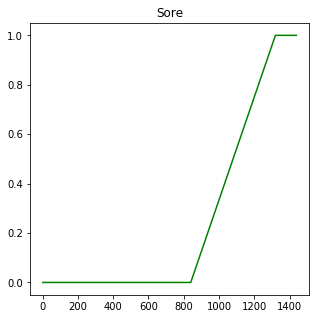

In [16]:
Jam_Sore = fuzz.trapmf(Jam_x,[840, 1320, 1440, 1440])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(5,5))
ax2.plot(Jam_x,Jam_Sore,'green')
ax2.set_title('Sore')

Gabungkan ke tiga fungsi keanggotan diatas, dengan cara perintah x.view()

C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


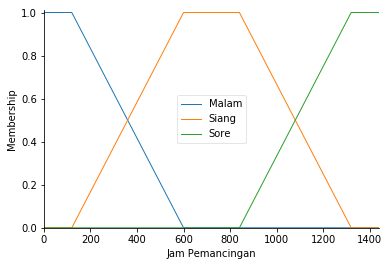

In [17]:
Jam_Pemancingan.view()

Himpunan fuzzy SIANG memiliki domain [120-1320] dan direpresentasikan sebagai kurva trapesium, dengan waktu interval [120-600] sebagai kurva linier naik, interval [600-840] kurva linier lurus dengan nilai keanggotaan 1, dan interval [840-1320] sebagai kurva linier turun. 

Himpunan fuzzy MALAM memiliki domain [0-600] yang direpresentasikan sebagai kurva trapezium, dengan waktu interval [0-120] sebagai kurva linier lurus dengan nilai keanggotaan 1, interval [120-600] sebagai kurva linier turun, 

Himpunan fuzzy SORE memiliki domain [840-1440] yang direpresentasikan sebagai kurva trapezium, dengan waktu interval [1320-1440] sebagai kurva linier lurus dengan nilai keanggotaan 1, dan interval [820-1320] sebagai kurva linier naik.

### Fuzzifikasi Ikan

Untuk Ikan, fungsi keanggotaan dibagi menjadi 2 bagian :
$$ Ikan$$
$$ Diurnal = 0  - 100$$
$$ Nokturnal = 0 - 100$$

Data ikan yang digunakan pada game ini yaitu 29 ikan yang terdiri dari 15 ikan diurnal dan 14 ikan nokturnal. Untuk mempermudah dalam penentuan ikan yang didapat maka nilai maksimal dari variabel ikan ini dibuat 100.sehingga variabel ikan yang didapat mempunyai semesta pembiraan [0-100] dan dibagi menjadi 2 himpunan fuzzy yaitu [DIURNAL, NOKTURNAL].


Dengan fungsi keanggotaan Ikan

\begin{equation}
  \mu Diurnal(Ikan)=\begin{cases}
    \frac{(100 - ikan)}{(100)} &,\text{$0\leq ikan\leq100$}.\\ 
  \end{cases}
  \\
  \mu Nokturnal(Ikan)=\begin{cases}
    \frac{(ikan)}{(100)} & ,\text{$0 \leq$ ikan $\leq 100$}.\\
  \end{cases}
\end{equation}



In [18]:
Ikan['Diurnal'] = fuzz.trimf(Ikan.universe, [ 0, 1, 100])
Ikan['Nokturnal'] = fuzz.trimf(Ikan.universe, [1, 100, 100])

#### PLOTTING MEMBERSHIP FUNCTION IKAN

Plotting fungsi keanggotaan $\mu Durnal(x)$

Text(0.5,1,'Diurnal')

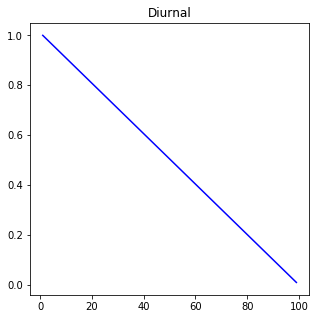

In [19]:
Ikan_Diurnal = fuzz.trimf(Ikan_x,[0,1,100,])
fig, (ax0) = plt.subplots(nrows=1,figsize=(5,5))
ax0.plot(Ikan_x,Ikan_Diurnal,'blue')
ax0.set_title('Diurnal')

Plotting fungsi keanggotaan $\mu Nokturnal(x)$

Text(0.5,1,'Nokturnal')

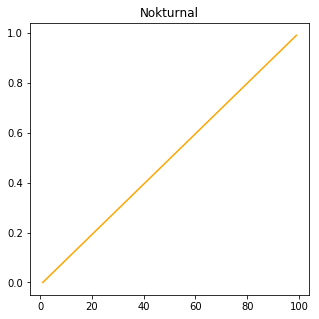

In [20]:
Ikan_Nokturnal = fuzz.trimf(Ikan_x,[1,100,100,])
fig2, (ax1) = plt.subplots(nrows=1,figsize=(5,5))
ax1.plot(Ikan_x,Ikan_Nokturnal,'orange')
ax1.set_title('Nokturnal')

Gabungkan ke tiga fungsi keanggotaan, dengan cara perintah x.view()

C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


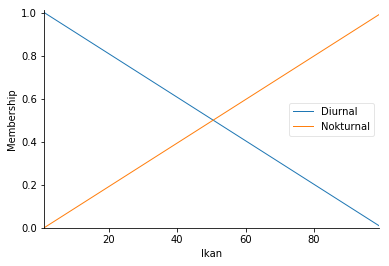

In [21]:
Ikan.view()

Himpunan fuzzy DIURNAL memiliki domain [0-100] yang direpresentasikan sebagai kurva linier turun.

Himpunan fuzzy NOKTURNAL memiliki domain [0-100] yang direpresentasikan sebagai kurva linier naik

###### =================================================================================================================

## Rule Base
Fuzzy rule base berisi pernyataan-pernyataan logika fuzzy (fuzzy statement), yang berbentuk pernyataan IF-THEN. Setelah dilakukan fuzzifikasi untuk setiap masukan dan keluaran, maka langkah berikutnya yaitu membuat aturan (rule base). Rule base ini terdiri dari kumpulan aturan yang berbasis logika fuzzy untuk menyatakan suatu kondisi. penyusunan rule base sangat berpengaruh pada presisi model, pada tahap pengambilan keputusan ditentukan berdasarkan rancangan rule base. aturan If-then yang dihubungkan dengan logika operasi AND dan OR.

Dibawah adalah perintah ctrl.rule() yang bertujuan untuk memasukan aturan aturan, disini teridiri dari 9 rule (aturan).

rule 1 = Jika kedalaman kail "Dangkal" dan jam "Siang" maka ikan yang didapat adalah "Diurnal"

rule 2 = Jika kedalaman kail "Dangkal" dan jam "Malam" maka ikan yang didapat adalah "Nokturnal"

rule 3 = Jika kedalaman kail "Dangkal" dan jam "Sore" maka ikan yang didapat adalah "Diurnal"

rule 4 = Jika kedalaman kail "Sedang" dan jam "Siang" maka ikan yang didapat adalah "Diurnal"

rule 5 = Jika kedalaman kail "Sedang" dan jam "Malam" maka ikan yang didapat adalah "Nokturnal"

rule 6 = Jika kedalaman kail "Sedang" dan jam "Sore" maka ikan yang didapat adalah "Nokturnal"

rule 7 = Jika kedalaman kail "Dalam" dan jam "Siang" maka ikan yang didapat adalah "Diurnal"

rule 8 = Jika kedalaman kail "Dalam" dan jam "Malam" maka ikan yang didapat adalah "Nokturnal"

rule 9 = Jika kedalaman kail "Dalam" dan jam "Sore" maka ikan yang didapat adalah "Nokturnal"

In [22]:
rule1 = ctrl.Rule(Kedalaman_Kail['Dangkal'] & Jam_Pemancingan['Siang'], Ikan['Diurnal'])
rule2 = ctrl.Rule(Kedalaman_Kail['Dangkal'] & Jam_Pemancingan['Malam'], Ikan['Nokturnal'])
rule3 = ctrl.Rule(Kedalaman_Kail['Dangkal'] & Jam_Pemancingan['Sore'], Ikan['Diurnal'])
rule4 = ctrl.Rule(Kedalaman_Kail['Sedang'] & Jam_Pemancingan['Siang'], Ikan['Diurnal'])
rule5 = ctrl.Rule(Kedalaman_Kail['Sedang'] & Jam_Pemancingan['Malam'], Ikan['Nokturnal'])
rule6 = ctrl.Rule(Kedalaman_Kail['Sedang'] & Jam_Pemancingan['Sore'], Ikan['Nokturnal'])
rule7 = ctrl.Rule(Kedalaman_Kail['Dalam'] & Jam_Pemancingan['Siang'], Ikan['Diurnal'])
rule8 = ctrl.Rule(Kedalaman_Kail['Dalam'] & Jam_Pemancingan['Malam'], Ikan['Nokturnal'])
rule9 = ctrl.Rule(Kedalaman_Kail['Dalam'] & Jam_Pemancingan['Sore'], Ikan['Nokturnal'])

## Rule Evaluation

In [23]:
pemancing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

pada perintah ctrl.controlsystem() adalah, sebuah perintah untuk memasukan semua rule yang diatas, 

lalu untuk mengakulasi rule rule yang diatas dengan cara ketikan perintah ctrl.controlsystemsimulation. 

In [24]:
pemancing = ctrl.ControlSystemSimulation(pemancing_ctrl)

## Defuzzifikasi

In [25]:
pemancing.input['Kedalaman Kail'] = 660
pemancing.input['Jam Pemancingan'] = 360

Input kedalaman Kail 700 Meter dan, 

Input Jam pemancingan 900 Menit

In [26]:
pemancing.compute()

Mengeluarkan hasil defazzifikasi

In [27]:
print(pemancing.output['Ikan'])

49.99999999999999


Hasil perhitungan dari computer adalah 49.99

C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


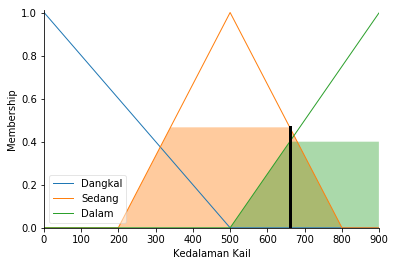

In [31]:
Kedalaman_Kail.view(sim=pemancing)

C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


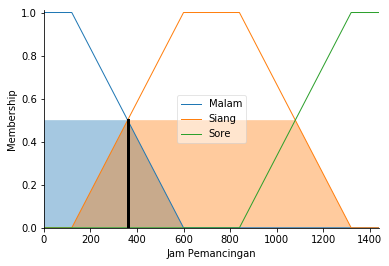

In [32]:
Jam_Pemancingan.view(sim=pemancing)

C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


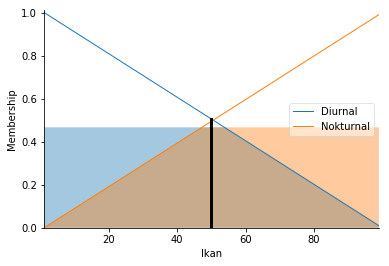

In [33]:
Ikan.view(sim=pemancing)

## Perhitungan Manual

#### Kedalaman Kail

\begin{equation}
    Kedalaman\,Kail = 600 \\
  \mu Dangkal(Kedalaman)=\begin{cases}
    \frac{(500 - Kedalaman)}{(500)} &,\text{$0\leq Kedalaman\leq500$}.\\ 
    0 &,\text{$500 \leq Kedalaman$}.\\
  \end{cases}
  \\
  \mu Sedang(Kedalaman)=\begin{cases}
    \frac{(Kedalaman - 200)}{(300)} & ,\text{$ 200 \leq$  Kedalaman $\leq500$}.\\
    \frac{(800-600)}{(300)} & ,\text{$ 500 \leq$ Kedalaman $\leq800$}.\\
    0  &, \text{$200 \geq$ Kedalamanan $ atau $ Kedalaman $\geq800$}.\\ 
  \end{cases} 
  \\
  \mu Dalam(Kedalaman)=\begin{cases}
    \frac{(600-500)}{(400)} & ,\text{$ 500 \leq$ Kedalaman $\leq900$}.\\
    0 &, \text{$500 \geq$ Kedalaman}.\\
  \end{cases}
\end{equation}



\begin{equation}
    \mu KedalamanSedang\,(600) = \frac{(800 - 600)}{(300)}\\
    \mu KedalamanSedang\,(600) = \frac{200}{300} \\ 
    \mu KedalamanSedang\,(600) = 0.66 \\
    \mu KedalamanDalam\,(600) = \frac{(600 - 500)}{(400)} \\
    \mu KedalamanDalam\,(600) = \frac{100}{400} \\
    \mu KedalamanDalam\,(600) = 0.25 \\
\end{equation}

#### Jam Pemancingan

\begin{equation}
    Jam\,Pemancingan = 360 \\
  \mu Siang(Jam)=\begin{cases}
    \frac{(360 - 120)}{(480)} &,\text{$120\leq Jam\leq600$}.\\ 
    1 &,\text{$600\leq Jam \leq840$}.\\
    \frac{(1320 - Jam)}{(480)} &,\text{$840\leq Jam\leq1320$}.\\ 
    0 &,\text{$1320 \leq Jam$ atau $\leq1440$}.\\
  \end{cases}
  \\
  \mu Malam(Jam)=\begin{cases}
    1 &, \text{$ 0 \leq$  Jam $\leq 120$}.\\
    \frac{(600 - 360)}{(480)} & ,\text{$ 120 \leq$  Jam $\leq 600$}.\\
    0 &,\text{$jam\leq 600$}.\\
  \end{cases}
  \\
  \mu Sore(Jam)=\begin{cases}
    0& , \text{$ Jam \leq840$}.\\
    \frac{(Jam - 840)}{(480)} & ,\text{$ 840 \leq$ Jam $\leq 1440$}.\\
    1 &, \text{$Jam \geq$ 1440}.\\
  \end{cases}
\end{equation}



\begin{equation}
    \mu JamSiang\,(360) = \frac{360 - 120)}{(480)} \\
    \mu JamSiang\,(360) = \frac{240}{480} \\ 
    \mu JamSiang\,(360) = 0.5 \\
    \mu JamMalam\,(360) = \frac{(600 - 360)}{(480)} \\
    \mu JamMalam\,(360) = \frac{240}{480} \\
    \mu JamMalam\,(360) = 0.5 \\
\end{equation}

Perhitungan $\mu$ yang didapat untuk fungsi keanggotaan Kedalaman Kail ada
- $\mu KedalamanSedang$ (800) = 0.66
- $\mu KedalamanDalam$ (800) = 0.25

Perhitungan $\mu$ yang didapat untuk fungsi keanggotaan Jam Pemancingan adalah
- $\mu JamSiang$ (900) = 0.5
- $\mu JamMalam$ (600) = 0.5

##### Rule 1. Jika kedalaman kail "Dangkal" dan jam "Siang" maka ikan yang didapat adalah "Diurnal"

$$ \\ \alpha(predikat_1) = \mu KedalamanDangkal \cap \mu JamSiang $$
$$\alpha(predikat_1)   = min (\mu KedalamanDangkal[600], \mu JamSiang[360]) $$
$$ \alpha(predikat_1) = min (0; 0.5) $$
$$ \alpha(predikat_1) = 0 $$


$$
   Ikan[Diurnal] = \mu(x)=\begin{cases}
    \frac{(100 - ikan)}{(100)} &,\text{$0\leq ikan\leq100$}.\\ 
  \end{cases}
 $$
Maka nilai $ Z_1 = 0 $

###### Rule 2. Jika kedalaman kail "Dangkal" dan jam "Malam" maka ikan yang didapat adalah "Nokturnal"
$$ \\ \alpha(predikat_1) = \mu KedalamanDangkal \cap \mu JamMalam $$
$$\alpha(predikat_1)   = min (\mu KedalamanDangkal[600], \mu JamMalam[360]) $$
$$ \alpha(predikat_1) = min (0; 0.5) $$
$$ \alpha(predikat_1) = 0 $$


$$
   Ikan[Nokturnal] = \mu(x)=\begin{cases}
    \frac{(ikan)}{(100)} & ,\text{$0 \leq$ ikan $\leq 100$}.\\
  \end{cases}
 $$
Maka nilai $ Z_2 = 0 $

###### Rule 3. Jika kedalaman kail "Dangkal" dan jam "Sore" maka ikan yang didapat adalah "Diurnal"

$$ \\ \alpha(predikat_1) = \mu KedalamanDangkal \cap \mu JamSore $$
$$\alpha(predikat_1)   = min (\mu KedalamanDangkal[600], \mu JamSore[360]) $$
$$ \alpha(predikat_1) = min (0; 0) $$
$$ \alpha(predikat_1) = 0 $$


$$
   Ikan[Diurnal] = \mu(x)=\begin{cases}
    \frac{(100 - ikan)}{(100)} &,\text{$0\leq ikan\leq100$}.\\ 
  \end{cases}
 $$
Maka nilai $ Z_3 = 0 $

###### Rule 4. Jika kedalaman kail "Sedang" dan jam "Siang" maka ikan yang didapat adalah "Diurnal"

$$ \\ \alpha(predikat_1) = \mu KedalamanSedang \cap \mu JamSiang $$
$$\alpha(predikat_1)   = min (\mu KedalamanSedang[600], \mu JamSiang[360]) $$
$$ \alpha(predikat_1) = min (0.66; 0.5) $$
$$ \alpha(predikat_1) = 0.5 $$


$$
   Ikan[Diurnal] = \mu(x)=\begin{cases}
    \frac{(100 - ikan)}{(100)} &,\text{$0\leq ikan\leq100$}.\\ 
  \end{cases}
$$

$$ \frac{(100 - Ikan)}{(100)} = 0.5 $$
$$ 100 - Ikan = 0.5 \times 100 $$
$$ 100 - Ikan =  50$$
$$ Ikan = 50 - 100$$
$$ -Ikan = -50 $$
$$ Ikan = 50 $$
 
 
 
Maka nilai $ Z_4 = 50 $

###### Rule 5. Jika kedalaman kail "Sedang" dan jam "Malam" maka ikan yang didapat adalah "Nokturnal"

$$ \\ \alpha(predikat_1) = \mu KedalamanSedang \cap \mu JamMalam $$
$$\alpha(predikat_1)   = min (\mu KedalamanSedang[600], \mu JamMalam[360]) $$
$$ \alpha(predikat_1) = min (0.66; 0.5) $$
$$ \alpha(predikat_1) = 0.5 $$


$$
   Ikan[Nokturnal] = \mu(x)=\begin{cases}
    \frac{(ikan)}{(100)} & ,\text{$0 \leq$ ikan $\leq 100$}.\\ 
  \end{cases}
$$

$$\frac{(ikan)}{(100)} = 0.5$$
$$ ikan = 0.5 \times 100$$
$$ ikan = 50

Maka nilai $ Z_5 = 50 $

###### Rule 6. Jika kedalaman kail "Sedang" dan jam "Sore" maka ikan yang didapat adalah "Nokturnal"

$$ \\ \alpha(predikat_1) = \mu KedalamanSedang \cap \mu JamSore $$
$$\alpha(predikat_1)   = min (\mu KedalamanSedang[600], \mu JamSore[360]) $$
$$ \alpha(predikat_1) = min (0.66; 0) $$
$$ \alpha(predikat_1) = 0 $$


$$
   Ikan[Nokturnal] = \mu(x)=\begin{cases}
    \frac{(ikan)}{(100)} &,\text{$0\leq ikan\leq100$}.\\ 
  \end{cases}
$$

Maka nilai $ Z_6 = 0$

###### Rule 7. Jika kedalaman kail "Dalam" dan jam "Siang" maka ikan yang didapat adalah "Diurnal"

$$ \\ \alpha(predikat_1) = \mu KedalamanDalam \cap \mu JamSiang $$
$$\alpha(predikat_1)   = min (\mu KedalamanDalam[600], \mu JamSiang[360]) $$
$$ \alpha(predikat_1) = min (0.25; 0.5) $$
$$ \alpha(predikat_1) = 0.25 $$


$$
   Ikan[Diurnal] = \mu(x)=\begin{cases}
    \frac{(100 - ikan)}{(100)} &,\text{$0\leq ikan\leq100$}.\\ 
  \end{cases}
$$

$$ \frac{(100 - Ikan)}{(100)} = 0.25 $$
$$ 100 - Ikan = 0.25 \times 100 $$
$$ 100 - Ikan = 25 $$
$$ Ikan = 25 - 100$$
$$ -Ikan = -75 $$
$$ Ikan = 75$$
 
 
 
Maka nilai $ Z_7 = 75 $

###### Rule 8. Jika kedalaman kail "Dalam" dan jam "Malam" maka ikan yang didapat adalah "Nokturnal"

$$ \\ \alpha(predikat_1) = \mu KedalamanDalam \cap \mu JamMalam $$
$$\alpha(predikat_1)   = min (\mu KedalamanDalam[600], \mu JamMalam[360]) $$
$$ \alpha(predikat_1) = min (0.25; 0.5) $$
$$ \alpha(predikat_1) = 0.25 $$


$$
   Ikan[Nokturnal] = \mu(x)=\begin{cases}
    \frac{(ikan)}{(100)} &,\text{$0\leq ikan\leq100$}.\\ 
  \end{cases}
$$

$$\frac{(ikan)}{(100)} = 0.25$$
$$ ikan = 0.25 \times 100$$
$$ ikan = 25

Maka nilai $ Z_8 = 25$

###### Rule 9. Jika kedalaman kail "Dalam" dan jam "Sore" maka ikan yang didapat adalah "Nokturnal"

$$ \\ \alpha(predikat_1) = \mu KedalamanDalam \cap \mu JamSore $$
$$\alpha(predikat_1)   = min (\mu KedalamanDalam[600], \mu JamSore[360]) $$
$$ \alpha(predikat_1) = min (0.25; 0) $$
$$ \alpha(predikat_1) = 0$$


$$
   Ikan[Nokturnal] = \mu(x)=\begin{cases}
    \frac{(ikan)}{(100)} &,\text{$0\leq ikan\leq100$}.\\ 
  \end{cases}
$$

Maka nilai $ Z_9 = 0$

###### ==================================================================================================================

Z = $$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 }
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9}$$

$$Z_1 = 0 $$ 
$$Z_2 = 0 $$ 
$$Z_3 = 0 $$
$$Z_4 = 50 $$
$$Z_5 = 50 $$
$$Z_6 = 0 $$
$$Z_7 = 75 $$
$$Z_8 = 25 $$
$$Z_9 = 0 $$

$$Z = \frac{0 + 0 + 0 + 0.5 \times 50 + 0.5 \times 50 + 0  + 0.25 \times 75 + 0.25 \times 25 + 0 }{0 + 0 + 0 + 0.5 + 0.5 + 0 + 0.25 + 0.25 + 0} $$
 
 $$ Z = \frac{25 + 25 + 18.75 + 6.25}{1.5} $$
 $$ Z = 50 $$

Hasil dari perhitungan computer diatas adalah 49.99 yang jika memakai pembulatan makan menjadi 50. sedangkan hasil dari perhitungan manual adalah 50. selisih dari perhitungan manual dan computer adalah -0.01 atau 0. dan,


$Nilai Errornya$
$\frac {(Hasil compute)-(Hasil Manual)}{(Hasil Compute)} \times 100 ===== $
$\frac {(50)-(50)}{(50)} \times 100$
$=0$

Data dari ikan yang digunakan di game ini yaitu 29, yang terdiri ikan diurnal 15 dan nokturnal 14. dan, berdasarkan hasil diatas yang kita dapat adalah 50. jadi kesempatan untuk menentukan ikan diurnal adalah 3.33 dan nokturnal adalah 3.5. dilihat dari data tersebut. maka, ikan nokturnal lah yang kemungkinan mudah didapat